In [55]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [3]:
cd ..

/Users/Faliha/Dropbox/Faliha Zikra MIS @ SCU/Machine learning/MachineLearning


In [49]:
df_train = pd.read_csv('data/newdf.csv')


In [50]:
df_train['Product_ID'] = df_train['Product_ID'].str[1:]# Drop the first character ‘P’ from product id
df_train = df_train.astype({'Product_ID':int}) # Recast all strings as ints

In [51]:
df_train.drop(['Unnamed: 0', 'discounted'], axis=1, inplace=True)

In [52]:
df=pd.get_dummies(df_train, columns=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years'])

In [66]:
X = df.drop(columns=['Purchase_x',])
y = df['Purchase_x']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=42)



## 1. Random Forest 

In [41]:

rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred = rfr.predict(X_test)

### RMSE

In [73]:

#calculating RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

2788.883452568274

The RMSE before feature engineering was 2865 , hence feature engineering helped reduce the RMSE. 

### Feature Importance

Text(0.5,0,'Gini Index')

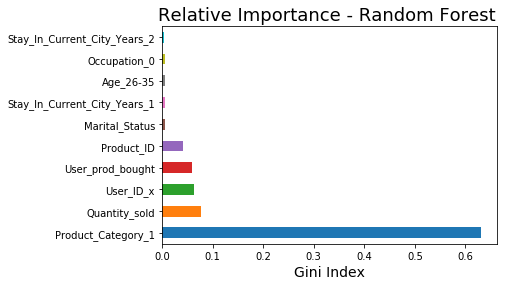

In [48]:
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Relative Importance - Random Forest ', fontsize=18)
plt.xlabel('Gini Index', fontsize=14)

 **Product Category, Quantiy sold, User ID and Number of items user bought seem to be the most important  features.**

The RMSE is definitely lower than RMSE given by the OLS model(See Appendix) which was 4382, clearly beacuse there isn't a linear relationship between the the deatures and and purchase amount 